### Question 10 in chatper 9 of Hands-On Machine Learning by Aurélien Géron (2nd Edition)

In [7]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
olivetti_faces = fetch_olivetti_faces(download_if_missing=True)

In [3]:
olivetti_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti_faces.data, olivetti_faces.target))

X_train_valid = olivetti_faces.data[train_valid_idx]
y_train_valid = olivetti_faces.target[train_valid_idx]

X_test = olivetti_faces.data[test_idx]
y_test = olivetti_faces.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]

X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.p

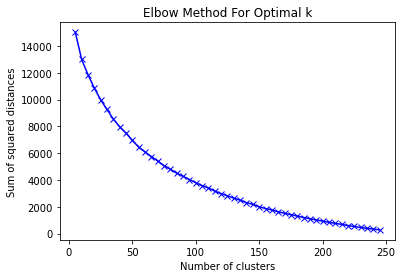

In [15]:

sum_squared_distances = []
kmeans_clusters_range = range(5, 250, 5)
for k in kmeans_clusters_range:
    kmeans = KMeans(n_clusters = k).fit(X_train)
    sum_squared_distances.append(kmeans.inertia_)

plt.plot(kmeans_clusters_range, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Without reducing the dataset, things take too long and not producing great results, so lets reduce the dataset

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Elbow Method For Optimal k')

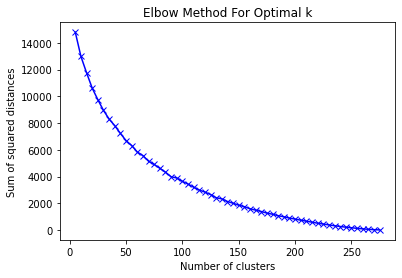

In [27]:
sum_squared_distances = []
kmeans_clusters_range = range(5, 280, 5)
for k in kmeans_clusters_range:
    kmeans = KMeans(n_clusters = k).fit(X_train_pca)
    sum_squared_distances.append(kmeans.inertia_)

plt.plot(kmeans_clusters_range, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

<AxesSubplot:>

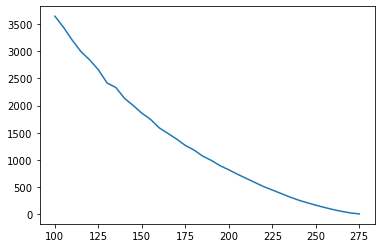

In [35]:
import seaborn as sns
sns.lineplot(x = kmeans_clusters_range[kmeans_clusters_range.index(100):], y = sum_squared_distances[kmeans_clusters_range.index(100):])

Not quite clear what the optimal k is for this dataset. Let's try the silhousetter method